# Assigment 1 

### PH17B009 - Rahul M N


Data : Sequence Chain Polymer. It consists of chain of two different monomers reprsented by 1 and 2 and the value for $R_{g}$ of the polymer. Contains 100 sequential 1s and 2s and the value of $R_{g}$ for the polymer which is the target variable. 

In [1]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pylab as plt
plt.figure(figsize=(20,10))
%matplotlib inline 
import seaborn as sns
import sklearn
import scipy
import tensorflow as tf
import math
import timeit

#### Parsing all the .txt to file and converting them into a pandas dataframe.  
All the files are parsed only once and stored into a dataframe. The dataframe will be used to train the model and predict the value of $R_{g}$

In [2]:
# allfiles = glob.glob('*.txt')
# #df = pd.concat((pd.read_csv(f) for f in allfiles))
# rg=[]
# data=pd.DataFrame()
# for f in allfiles: 
#     c= pd.read_csv(f,header = None, index_col=False)
#     c1=c.T
#     rg.append(c.loc[100])
#     data= data.append(c1) 
       
      

### Converting the parsed data into a pandas dataframe for easier use in the future

In [3]:
#data.to_csv('data.csv')

In [4]:
#reading the parsed data
data = pd.read_csv("data_csv")

In [5]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,3.63092
1,0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.27218
2,0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.21222
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,3.23030
4,0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,...,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.44867


In [6]:
#To remove the column named "unnamed" in the begining of the dataframe. 
data.columns.str.match("Unnamed")
data = data.loc[:,~data.columns.str.match("Unnamed")]

In [7]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,...,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,3.63092
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.27218
2,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.21222
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,3.23030
4,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.44867


In [8]:
data.shape

(3030, 101)

### Converting the dataframe into numpy arrays containing Features and target variable

In [9]:
X = data.iloc[:, data.columns != 100] # Features
Y = data.iloc[:,100]
d=pd.DataFrame(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.7,shuffle=False,random_state=0)

In [11]:
n_features = X_train.shape[1]
n_features

101

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = tf.keras.Sequential()
from sklearn.metrics import r2_score 
from keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.models import load_model

### Building a Deep Learning model.  

In [13]:
# model = Sequential()
# model.add(Dense(40, activation='relu',kernel_regularizer=l2(0.001),kernel_initializer='normal', input_shape=(n_features,)))
# model.add(BatchNormalization())
# model.add(Dense(25, activation='relu', kernel_regularizer=l2(0.001),kernel_initializer='normal'))
# model.add(BatchNormalization())
# model.add(Dense(15, activation='relu',kernel_regularizer=l2(0.001), kernel_initializer='normal'))
# model.add(BatchNormalization())
# model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.001),kernel_initializer='normal'))
# model.add(BatchNormalization())
# model.add(Dense(1,  activation='linear'))

In [14]:
model = load_model('model.h5')

### Model Architecture 

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                4080      
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1025      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                390       
_________________________________________________________________
batch_normalization_2 (Batch (None, 15)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [16]:
from tensorflow.keras.utils import plot_model
# plot_model(model, 'model.png', show_shapes=True)

### Compiling, Training, and using the trained model for prediction. 

In [17]:
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
#history = model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=0,validation_data=(X_test,Y_test))


In [18]:
#Prediction
Y_pred = model.predict(X_test)
# evaluate the model
error = model.evaluate(X_test, Y_test, verbose=0)
r2 = r2_score(Y_test,Y_pred ) 
print('r2 score Test data: ', r2) 
print('MSE: %.3f, RMSE: %.3f' % (error, math.sqrt(error)))

r2 score Test data:  0.9774061933592119
MSE: 0.018, RMSE: 0.135


### Plot of Predicted $R_{g}$ vs Actual $R_{g}$ - Test Data

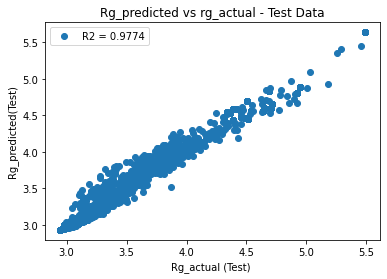

In [19]:
plt.plot(Y_test,Y_pred,'o',label='R2 = %.4f' %(r2)) 
plt.legend()
plt.title('Rg_predicted vs rg_actual - Test Data')
plt.xlabel('Rg_actual (Test) ')
plt.ylabel('Rg_predicted(Test)')
plt.savefig('Model_Test.png')

In [20]:
model.save("model.h5")

In [21]:
y_train_val=model.predict(X_train)
error2 = model.evaluate(X_test, Y_test, verbose=0)
r22 = r2_score(y_train_val,Y_train ) 
print('r2 score _ Train data : ', r22) 
print('MSE: %.3f, RMSE: %.3f' % (error2, math.sqrt(error2)))

r2 score _ Train data :  0.9835241457871785
MSE: 0.018, RMSE: 0.135


### Plot of Predicted $R_{g}$ vs Actual $R_{g}$ - Train Data

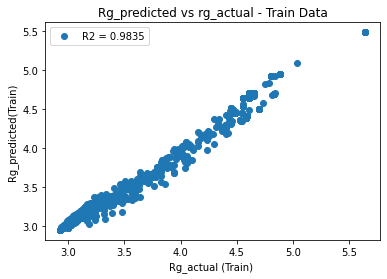

In [22]:
plt.plot(y_train_val,Y_train,'o',label='R2 = %.4f' %(r22)) 
plt.legend()
plt.title('Rg_predicted vs rg_actual - Train Data')
plt.xlabel('Rg_actual (Train) ')
plt.ylabel('Rg_predicted(Train)')
plt.savefig('Model_train.png')